# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [14]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy.stats as stats

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

In [6]:
data = pd.read_csv('../data/absences.csv')

In [7]:
data.head()

,Unnamed: 0,EmployeeID,Age,Absences
0,0,1,27,15
1,1,2,61,6
2,2,3,37,10
3,3,4,23,18
4,4,5,46,9


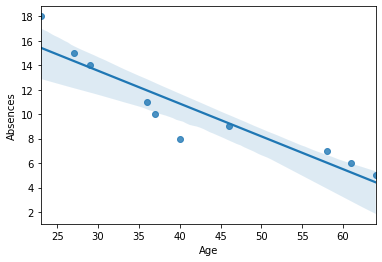

In [8]:
# your code here

sns.regplot(x=data['Age'], y=data['Absences'], data=data)

In [9]:
# your comments here

"""
Yes, it seems that if your employees are younger, they take more absences than the older ones.

"""


'\nYes, it seems that if your employees are younger, they take more absences than the older ones.\n\n'

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [12]:
# your code here

age_mean = np.mean(data['Age'])
absence_mean = np.mean(data['Absences'])

xi_x = np.array([a - age_mean for a in data['Age']])
yi_y = np.array([ab - absence_mean for ab in data['Absences']])

numerator = np.sum(xi_x * yi_y)

xi_x2 = np.array([(a - age_mean)**2 for a in data['Age']])
denominator = np.sum(xi_x2)

slope = numerator / denominator
slope

-0.2681088337033404

In [13]:
intercept = absence_mean - slope*age_mean
intercept

21.58738189891063

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [15]:
# your code here

slope, intercept, r_value, p_value, std_err = stats.linregress(data['Age'], data['Absences'])


In [ ]:
# your comments here

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [25]:
# your code here

def cov_col(x, y): 
    xi_x = np.array([a - age_mean for a in data['Age']])
    yi_y = np.array([ab - absence_mean for ab in data['Absences']])
    covariance = np.sum(xi_x*yi_y)/(len(x)-1)
    correlation = (np.sum(xi_x*yi_y))/np.sqrt(np.sum(xi_x**2)*(np.sum(yi_y**2)))
    print(covariance, correlation)


#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [26]:
# your code here

cov_col(data['Age'], data['Absences'])

-57.699999999999996 -0.9325434092481012


In [ ]:
# your comments here

"""
Negative because the line is going down.
"""

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [ ]:
# your comments here

"""
Yes, it is. More age, less absences.
"""

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [27]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

In [28]:
ironbeers_df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,9


#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [38]:
# your code here

def cov_col(x, y): 
    xi_x3 = np.array([x - x_mean for x in ironbeers_df['X']])
    yi_y3 = np.array([y - y_mean for y in ironbeers_df['Y']])
    covariance = np.sum(xi_x3*yi_y3)/(len(x)-1)
    correlation = (np.sum(xi_x3*yi_y3))/np.sqrt(np.sum(xi_x3**2)*(np.sum(yi_y3**2)))
    print(covariance, correlation)

In [37]:
cov_col(ironbeers_df['X'], ironbeers_df['Y'])

12.0 0.9770084209183943


In [39]:
# your comments here

"""
Covariance is 12.0
Correlation is 0.977
"""

'\nCovariance is 12.0\nCorrelation is 0.977\n'

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

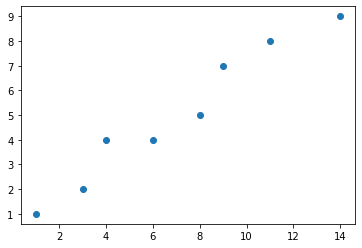

In [43]:
# your code here

plt.scatter(ironbeers_df['X'],ironbeers_df['Y'])

In [ ]:
# your comments here

"""
There's a correlation between people you told to stay and people who finally stay.
"""

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [47]:
# your code here
from sklearn import linear_model

slope, intercept, r_value, p_value, std_err = stats.linregress(ironbeers_df["X"],ironbeers_df["Y"])

In [48]:
slope

0.6363636363636364

In [49]:
intercept

0.5454545454545459

In [ ]:
# your comments here

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [50]:
# your comments here

# I am not the reason. Actually, more I say to people, more they stay on the Ironbeers.

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here